Binary logistic regression

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Ex. 1, Ex. 2

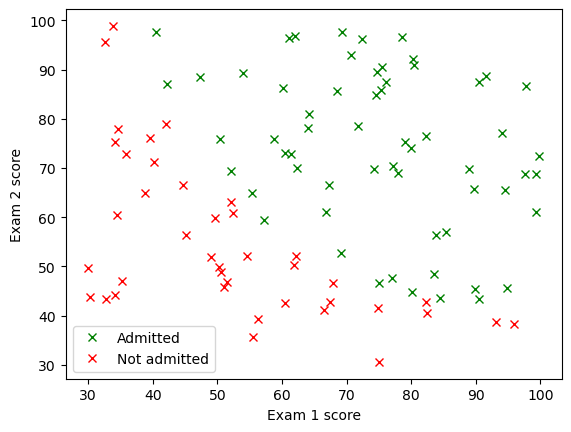

In [123]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

theta = np.zeros((X.shape[0]+1, 1))

X = np.concatenate([np.ones([1, X.shape[1]]), X])

plt.figure()
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'gx', label='Admitted')
plt.plot(X1_0, X2_0, 'rx', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='lower left')
plt.show()

In [124]:
for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

Ex. 3

In [125]:
def sig(t):
    return 1 / (1 + np.exp(-t))

Ex. 4

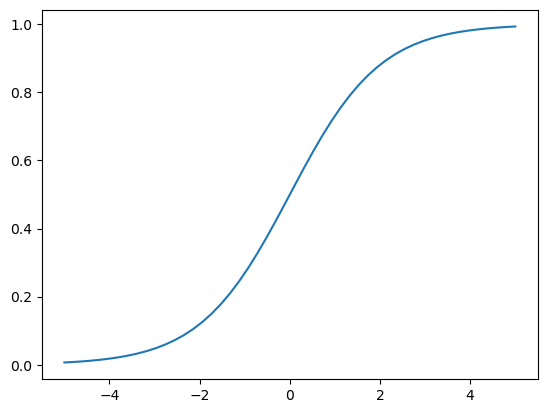

In [126]:
plt.plot(np.linspace(-5, 5), sig(np.linspace(-5, 5)))
plt.show()

Ex. 5

In [127]:
def h(X, theta):
    return 1 / (1 + np.exp(-theta.T @ X))

def compute_cost(X, y, theta):
    return (-y * np.log(h(X, theta)) - (1 - y) * np.log(1 - h(X, theta))).sum() / y.shape[1]

In [128]:
compute_cost(X, y, theta)

0.6931471805599453

Ex. 6

In [129]:
def simple_gradient(X, y, theta, alpha, it):
    cost = []
    for _ in range(it):
        theta[0, 0] = theta[0, 0] - alpha * (h(X, theta) - y).sum() / X.shape[1]
        theta[1, 0] = theta[1, 0] - alpha * ((h(X, theta) - y) @ X[1, :]).sum() / X.shape[1]
        theta[2, 0] = theta[2, 0] - alpha * ((h(X, theta) - y) @ X[2, :]).sum() / X.shape[1]
        cost.append(compute_cost(X, y, theta))
    return theta, cost

In [130]:
theta, cost = simple_gradient(X, y, theta, alpha=1, it=150)
print(cost[-1], '\n', theta)

0.20619425502972785 
 [[1.42929788]
 [3.38040725]
 [3.13521188]]


Ex. 7

In [131]:
y_pred = h(X, theta)
((y_pred >= 0.5).astype(int)==y).astype(int).sum() / y.shape[1]

0.89

Ex. 8

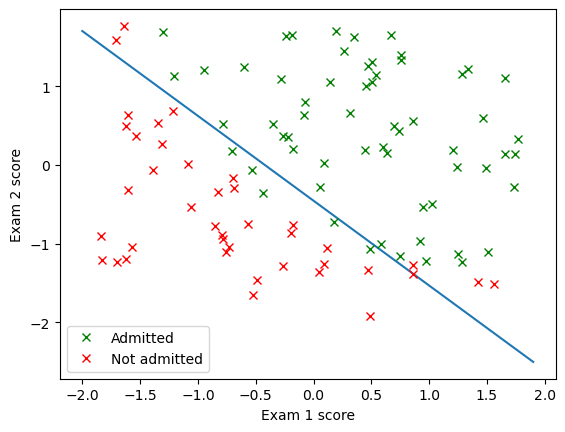

In [132]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1
plt.figure()
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'gx', label='Admitted')
plt.plot(X1_0, X2_0, 'rx', label='Not admitted')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(loc='lower left')
plt.show()

Multic-class logistic regression

In [200]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

Penalty 'none' with solver 'lbfgs'

In [229]:
regression_model = LogisticRegression(penalty='none', solver='lbfgs', max_iter=1000).fit(X, Y)

In [230]:
def plot_log_reg(regression_model):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = .02  # step size in the mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = regression_model.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())

    plt.show()

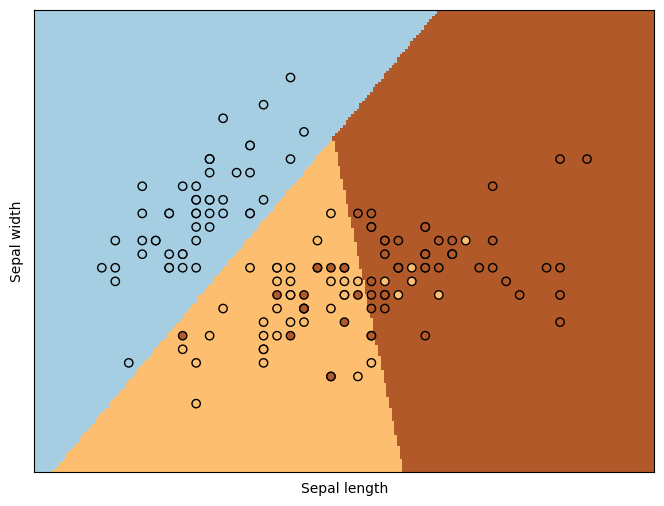

In [231]:
plot_log_reg(regression_model)

Accuracy of the algorithm performance with a threshold - 0.66 and a 'model_score' method.

In [232]:
y_pred = regression_model.predict_proba(X)
print(((y_pred.max(axis=1) > 0.66) == True).sum() / y_pred.shape[0])
regression_model.score(X, Y)

0.7466666666666667


0.8333333333333334

Penalty 'none' with solver 'newton-cg'

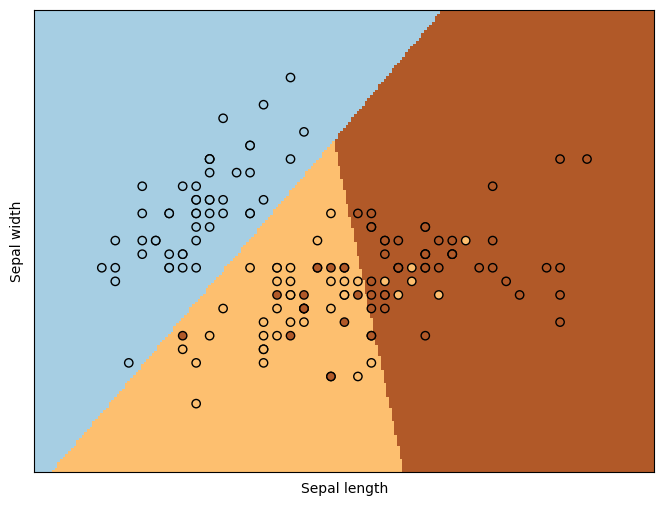

In [233]:
regression_model = LogisticRegression(penalty='none', solver='newton-cg', max_iter=1000).fit(X, Y)
plot_log_reg(regression_model)

In [234]:
y_pred = regression_model.predict_proba(X)
print(((y_pred.max(axis=1) > 0.66) == True).sum() / y_pred.shape[0])
regression_model.score(X, Y)

0.7466666666666667


0.8333333333333334

Penalty 'l2' with solver 'newton-cg'

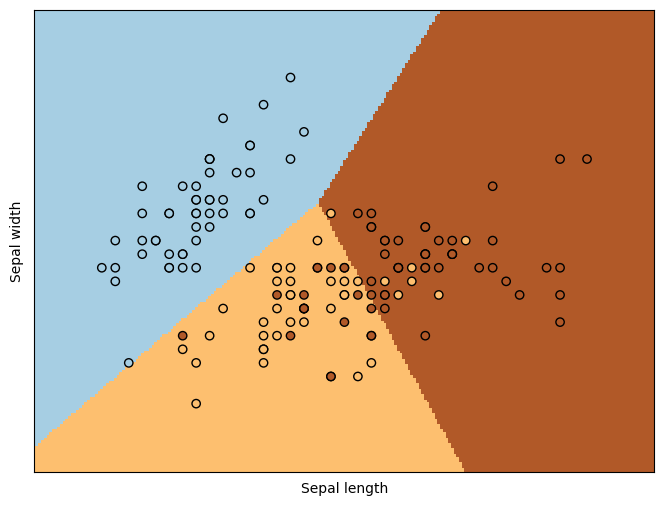

In [249]:
regression_model = LogisticRegression(penalty='l2', solver='newton-cg', max_iter=1000).fit(X, Y)
plot_log_reg(regression_model)

In [250]:
y_pred = regression_model.predict_proba(X)
print(((y_pred.max(axis=1) > 0.66) == True).sum() / y_pred.shape[0])
regression_model.score(X, Y)

0.6066666666666667


0.82

The best combination of solver is 'lfbgs' with 'none' penalty and 'newton-cg' also with 'none' penalty, they both returned score 0.833 and accuracy 0.746. 